In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

font = {'size': 18, 'family':'Latin Modern Roman'}
axislabelfontsize='large'
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
year = 365*24*3600 # Seconds
nobsinyear = 2*12 # Assuming stars are observed twice a month
fstar = (365*24*3600)**(-1)
tobs = 20/fstar
nobstot = nobsinyear*(tobs/year)

h0 = 2.15e-18
beta = 1.23e-3

conversion = (2*(np.pi**2)*(fstar**2))*(2*fstar)/(3*(h0**2))

def Delta_p0(sigma, N, factor):
    Dp0 = (np.sqrt(2/factor)) * ((sigma**2)/N)
    return Dp0

from scipy.integrate import quad

def dfgamma(nI):
    df_gamma = lambda f: (f/ fstar)**nI
    lower_limit = 1/tobs
    upper_limit = 5e-8
    result, error = quad(df_gamma, lower_limit, upper_limit)
    return result

def deltaI0(sigma, N, factor, nI):
    deltaI0 = 8*np.pi * Delta_p0(sigma, N, factor)/dfgamma(nI)/np.sqrt(nobstot)
    return deltaI0

def deltaI0_dipole(sigma, N, factor, nI):
    deltaI0 = (8*np.pi / (4*beta)) * Delta_p0(sigma, N, factor)/dfgamma(nI)/np.sqrt(nobstot)
    return deltaI0
    
def deltaI0_dipoleTimesbeta(sigma, N, factor, nI):
    deltaI0b = (8*np.pi) * Delta_p0(sigma, N, factor)/dfgamma(nI)/np.sqrt(nobstot)
    return deltaI0b


# Test to see if the functions above are working
nI = -7/3
factor00 = 0.65 # proporcionality constant for the Trace[H0 H0]
print(dfgamma(nI))
print(deltaI0( 2e-7, nI, 1000, factor00))


1.278145836388356e-06
-2.1659099620951837e-08


# Monopole

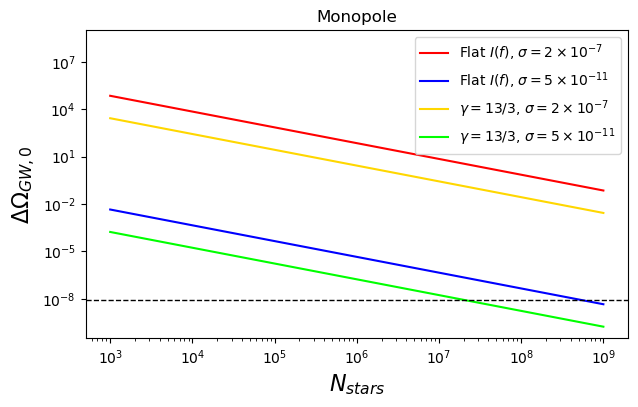

In [3]:
nI_1 = 0
nI_2 = -7/3
factor00 = 3
N = np.arange(1000, 10e8, 1000)

D_OmegaGW_1 = deltaI0( 2e-7, N, factor00, nI_1)*conversion
D_OmegaGW_2 = deltaI0( 5e-11, N, factor00, nI_1)*conversion
D_OmegaGW_3 = deltaI0( 2e-7, N, factor00, nI_2)*conversion
D_OmegaGW_4 = deltaI0( 5e-11, N, factor00, nI_2)*conversion

I0 = 9.1e-23
Omega_GW0 = I0 *conversion

plt.figure(figsize=(7, 4))
plt.loglog(N, D_OmegaGW_1, color='r', label='Flat $I(f)$, $\sigma = 2 \\times 10^{-7}$')
plt.loglog(N, D_OmegaGW_2, color='b', label='Flat $I(f)$, $\sigma = 5 \\times 10^{-11}$')
plt.loglog(N, D_OmegaGW_3, color='gold', label='$\gamma = 13/3$, $\sigma = 2 \\times 10^{-7}$')
plt.loglog(N, D_OmegaGW_4, color='lime', label='$\gamma = 13/3$, $\sigma = 5 \\times 10^{-11}$')
plt.axhline(y=Omega_GW0, color='black', linestyle='--', linewidth=1)
plt.ylim(top=10e8)
plt.xlabel(r'$N_{stars}$',size=16)
plt.ylabel("$\Delta \Omega_{GW,0}$",size=16)
plt.title("Monopole")
plt.legend()
#plt.grid(True)

plt.savefig("Forecast_Monopole.pdf", bbox_inches='tight')


# Dipole

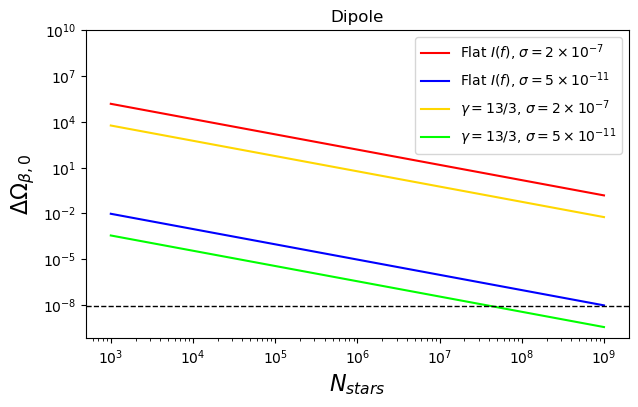

In [9]:
nI_1 = 0
nI_2 = -7/3
factor11 = 0.65
N = np.arange(1000, 10e8, 10000)

D_OmegaGW_dip_1 = deltaI0_dipoleTimesbeta( 2e-7, N, factor11, nI_1)*conversion
D_OmegaGW_dip_2 = deltaI0_dipoleTimesbeta( 5e-11, N, factor11, nI_1)*conversion
D_OmegaGW_dip_3 = deltaI0_dipoleTimesbeta( 2e-7, N, factor11, nI_2)*conversion
D_OmegaGW_dip_4 = deltaI0_dipoleTimesbeta( 5e-11, N, factor11, nI_2)*conversion

plt.figure(figsize=(7, 4))
plt.loglog(N, D_OmegaGW_dip_1, color='r', label='Flat $I(f)$, $\sigma = 2 \\times 10^{-7}$')
plt.loglog(N, D_OmegaGW_dip_2, color='b', label='Flat $I(f)$, $\sigma = 5 \\times 10^{-11}$')
plt.loglog(N, D_OmegaGW_dip_3, color='gold', label='$\gamma = 13/3$, $\sigma = 2 \\times 10^{-7}$')
plt.loglog(N, D_OmegaGW_dip_4, color='lime', label='$\gamma = 13/3$, $\sigma = 5 \\times 10^{-11}$')
plt.axhline(y=Omega_GW0, color='black', linestyle='--', linewidth=1)
plt.ylim(top =10e9)

plt.xlabel(r'$N_{stars}$',size=16)
plt.ylabel(r"$\Delta \Omega_{\beta ,0} $",size=16)
plt.title("Dipole")
plt.legend()
#plt.grid(True)

plt.savefig("Forecast_Dipole_OmTimesbeta.pdf", bbox_inches='tight')

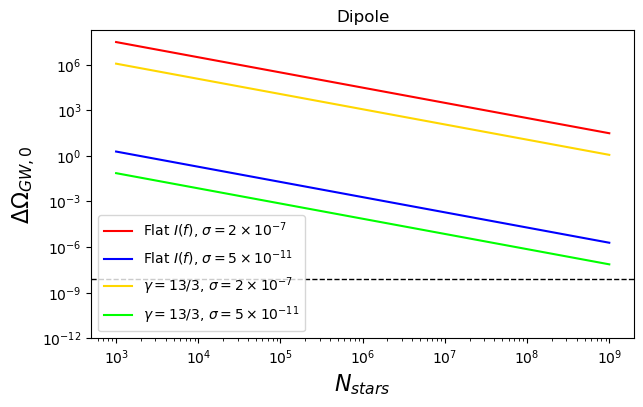

In [8]:
nI_1 = 0
nI_2 = -7/3
factor11 = 0.65
N = np.arange(1000, 10e8, 10000)

D_OmegaGW_dip_1 = deltaI0_dipole( 2e-7, N, factor11, nI_1)*conversion
D_OmegaGW_dip_2 = deltaI0_dipole( 5e-11, N, factor11, nI_1)*conversion
D_OmegaGW_dip_3 = deltaI0_dipole( 2e-7, N, factor11, nI_2)*conversion
D_OmegaGW_dip_4 = deltaI0_dipole( 5e-11, N, factor11, nI_2)*conversion

plt.figure(figsize=(7, 4))
plt.loglog(N, D_OmegaGW_dip_1, color='r', label='Flat $I(f)$, $\sigma = 2 \\times 10^{-7}$')
plt.loglog(N, D_OmegaGW_dip_2, color='b', label='Flat $I(f)$, $\sigma = 5 \\times 10^{-11}$')
plt.loglog(N, D_OmegaGW_dip_3, color='gold', label='$\gamma = 13/3$, $\sigma = 2 \\times 10^{-7}$')
plt.loglog(N, D_OmegaGW_dip_4, color='lime', label='$\gamma = 13/3$, $\sigma = 5 \\times 10^{-11}$')
plt.axhline(y=Omega_GW0, color='black', linestyle='--', linewidth=1)
plt.ylim(bottom =10e-13)
plt.xlabel(r'$N_{stars}$',size=16)
plt.ylabel(r"$\Delta \Omega_{GW ,0} $",size=16)
#plt.ylabel(r"$\Delta \Omega_{\beta ,0} $",size=16)
plt.title("Dipole")
plt.legend()
#plt.grid(True)

plt.savefig("Forecast_Dipole.pdf", bbox_inches='tight')
